# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

from webdriver_manager.chrome import ChromeDriverManager


In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html

mars_soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
# using "inspect" the table is a table element with class="table"

scraped_rows = mars_soup.find_all('tr', class_='data-row')

#view the firstitem in the list
scraped_rows[0]

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
#list will store rows from table

mars_table_rows = []

# Loop through the scraped data to create a list of rows

for row in scraped_rows:
    #print(row)
    
    # get row data using <td> and text
    # do this for each <td> in the row as (there are several)
    table_data = row.find_all('td')
    
    # use list comprehension to iterate over the many columns in each row
    # this uses a parameter column
    # For each each column in the row get column text
    table_row = [col.text for col in table_data] # list comprehension
    
    # append table_rowto mars_table_rows list using append method
    mars_table_rows.append(table_row)
    
#view the result
mars_table_rows
    
    


[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_table_df = pd.DataFrame(mars_table_rows, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
mars_table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
# Confirm DataFrame was created successfully
mars_table_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [11]:
# Change data types for data analysis
# change as follows:

## terrestrial_date: date using datetime
mars_table_df['terrestrial_date'] = pd.to_datetime(mars_table_df['terrestrial_date'])

## id:int using astype and int
# mars_table_df['id'] = mars_table_df['id'].astype('int')
## sol : int
## ls : int
## month : int
mars_table_df[['id','sol','ls','month']]= mars_table_df[['id','sol','ls','month']].astype('int')

## min_temp: float using astype and float
##pressure: float
mars_table_df[['min_temp','pressure']] = mars_table_df[['min_temp','pressure']].astype('float')

In [12]:
# Confirm type changes were successful by examining data types again
mars_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?

number_of_months = len(mars_table_df['month'].unique())
print(number_of_months)
#number_of_months = Len(mars_table_df['months'].unique())
print(f"There are {number_of_months} months on Mars")

12
There are 12 months on Mars


In [14]:
# 2. How many Martian days' worth of data are there?
# this is number of sol
Mars_sols_of_data = len(mars_table_df['sol'])
print(f"There are {Mars_sols_of_data} Mars sols of data)")

There are 1867 Mars sols of data)


In [15]:
# 3. What is the average low temperature by month?
# use groupby and groupby month to get a dataframe of averages
mars_avg_df = mars_table_df.groupby('month').mean()
mars_avg_temp = round(mars_table_df['min_temp'].mean(),3)
print(f"Mars avg temp is : {mars_avg_temp}")
# reset_index to be able to use month as column value
mars_avg_df.reset_index(inplace = True)
mars_avg_df

Mars avg temp is : -76.121


,month,id,sol,ls,min_temp,pressure
0,1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
1,2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
2,3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
3,4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
4,5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
5,6,735.306122,750.829932,164.897959,-75.299320,745.054422
6,7,714.549296,715.105634,194.894366,-72.281690,795.105634
7,8,718.078014,795.333333,224.347518,-68.382979,873.829787
8,9,785.843284,861.186567,254.052239,-69.171642,913.305970
9,10,955.723214,1034.669643,286.330357,-71.982143,887.312500


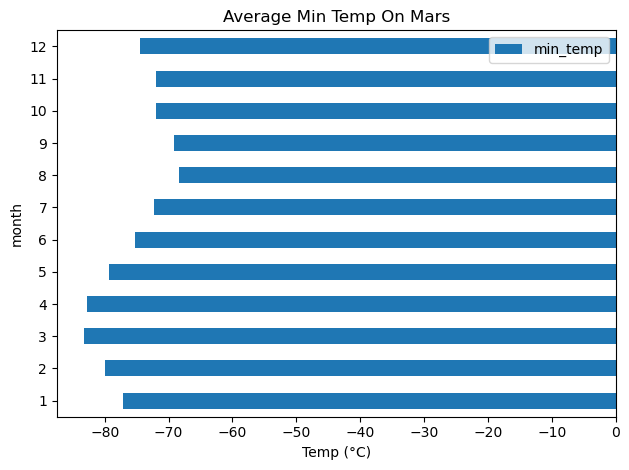

In [16]:
# Plot the average temperature by month
# use pyplot and plot month and min_temp

mars_avg_df.plot.barh(x = 'month', y = 'min_temp')
plt.title("Average Min Temp On Mars")
plt.xlabel("Temp (°C)") # note: to get degrees press Alt + 0176 # Or use Character Map to get degrees

plt.tight_layout()
plt.savefig("./Images/Min_Temps_Mars.png")
plt.show()

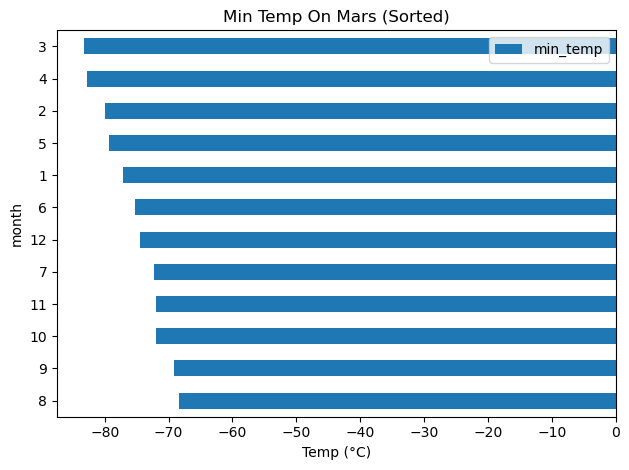

In [17]:
# Identify the coldest and hottest months in Curiosity's location
# Plot in descending order

mars_avg_sorted_df = mars_avg_df.sort_values('min_temp', ascending = False)
mars_avg_sorted_df

# now recreate plot above

mars_avg_sorted_df.plot.barh(x = 'month', y = 'min_temp')
plt.title("Min Temp On Mars (Sorted)")
plt.xlabel("Temp (°C)")

plt.tight_layout()
plt.savefig("./Images/Min_Temps_Mars_Sorted.png")
plt.show()


In [18]:
# 4. Average pressure by Martian month
#mars_avg_df and pressure column
# use pyplot and plot month and pressure

avg_pressures = mars_avg_df.groupby("month")["pressure"].mean()


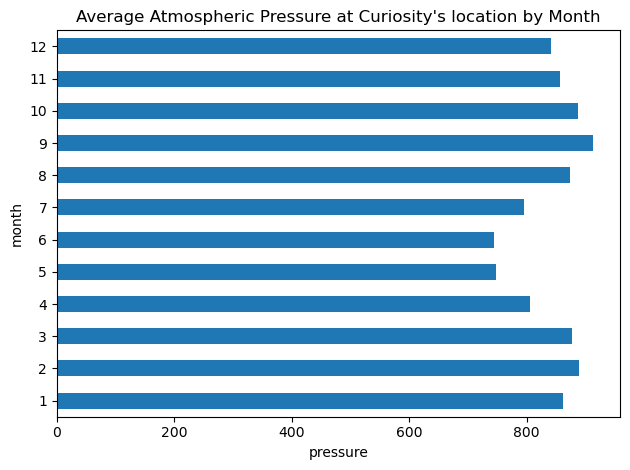

In [19]:
# Plot the average pressure by month
avg_pressures.plot.barh(x = 'month', y = 'pressure')
plt.title("Average Atmospheric Pressure at Curiosity's location by Month")
plt.xlabel('pressure')

plt.tight_layout()
plt.savefig("./Images/Min_Pressure_Mars.png")
plt.show()

Text(1000, -90, 'End of Year')

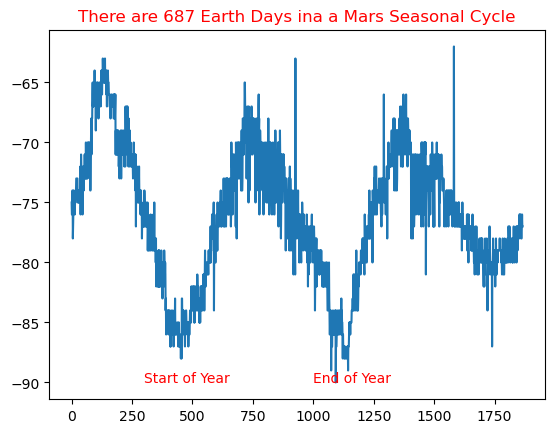

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# there are 687 earth days in a martian year
# to visualize this cycle create a line plot

mars_table_df['min_temp'].plot()

plt.title("There are 687 Earth Days ina a Mars Seasonal Cycle", color = 'red')
plt.annotate("Start of Year", (300, -90), color = 'red')
plt.annotate("End of Year", (1000, -90), color = 'red')




On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from valley to valley is roughly 1175-500 or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
# Data is in mars_table_df use to_csv to save csv file
mars_table_df.to_csv("./Output_data/mars_table.csv")

In [22]:
browser.quit()